In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="whitegrid", font_scale=1.1)

def boxplot(data, column):
    plt.figure(figsize=(8,5))

    ax = sns.boxplot(
        data=data,
        y=column,
        palette='pastel',
        notch=True,
        width=0.2
    )

    ax.set_title(f'{column}', fontsize=14, weight='bold')
    ax.set_ylabel(column, fontsize=12)
    plt.ylim(bottom=-1)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.savefig(rf'images/boxplots/{column}.png', transparent=True, bbox_inches='tight')



def barplot(data, column):
    plt.figure(figsize=(8,5))


    ax = sns.countplot(
        data=data,
        x=column,
        hue=column,
        palette='pastel',
        width=0.6
    )

    if ax.get_legend() is not None:
        ax.get_legend().remove()
    ax.set_title(f'{column}', fontsize=14, weight='bold')
    ax.set_ylabel(column, fontsize=12)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.savefig(rf'images/barplots/{column}.png', transparent=True, bbox_inches='tight')

C:\Users\pietr\AppData\Local\Temp\ipykernel_7540\2019391587.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\pietr\AppData\Local\Temp\ipykernel_7540\2019391587.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\pietr\AppData\Local\Temp\ipykernel_7540\2019391587.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\pietr\AppData\Local\Temp\ipykernel_7540\2019391587.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figu

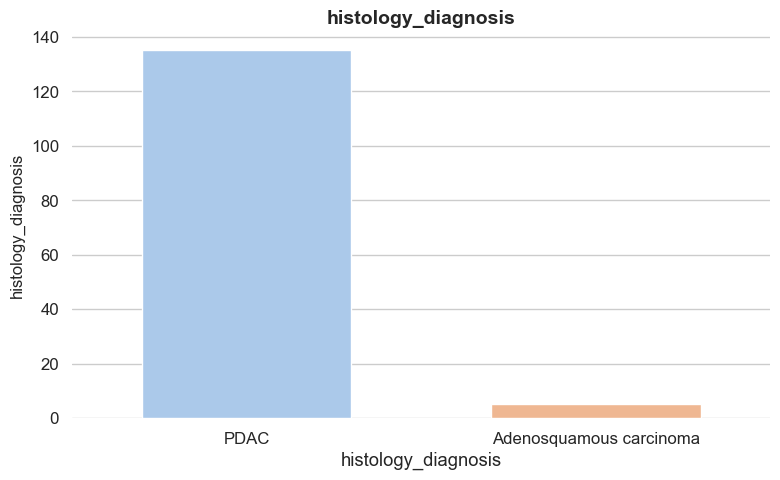

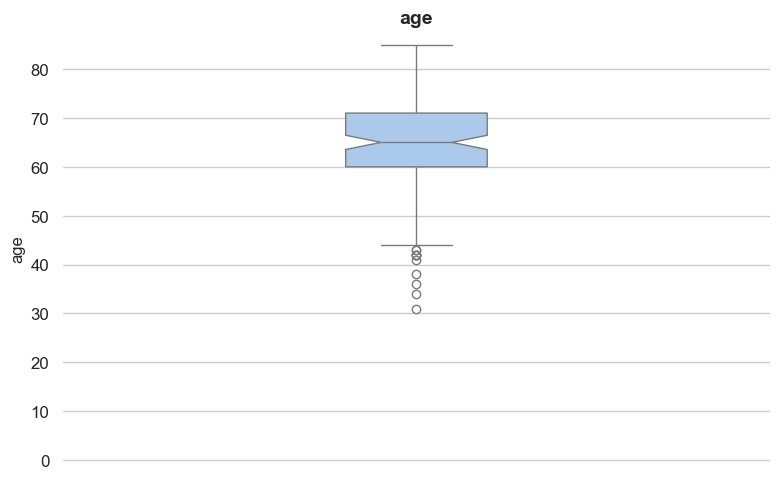

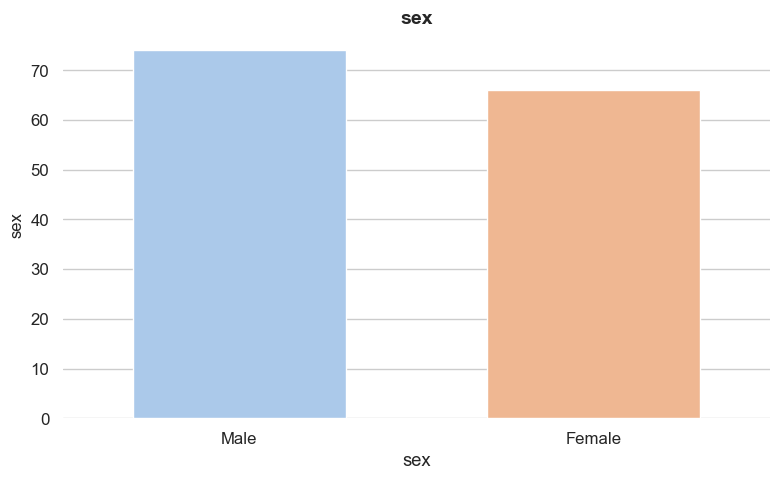

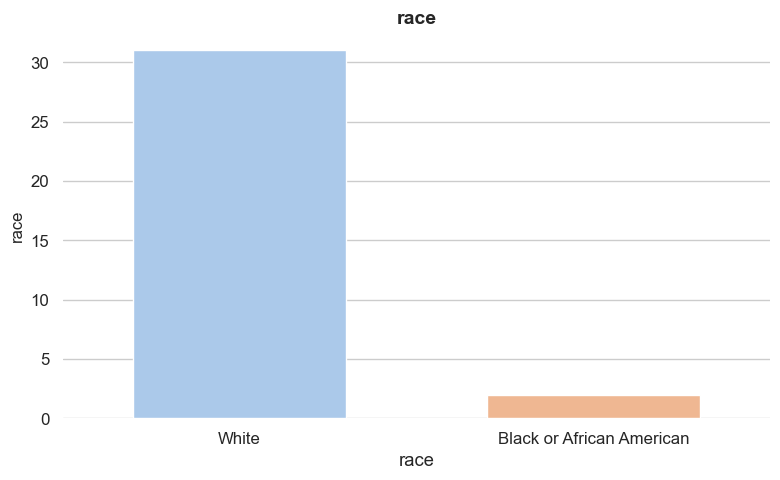

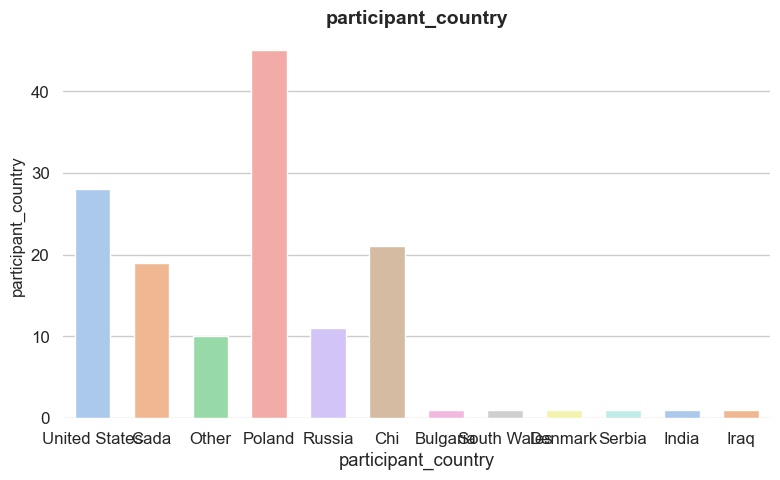

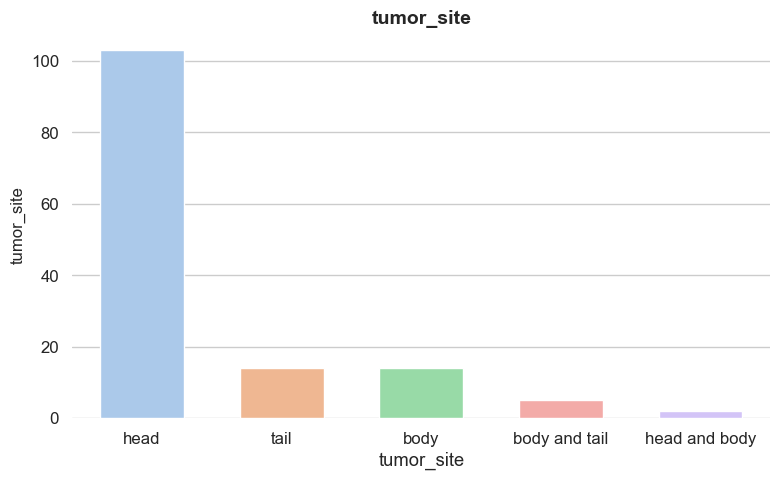

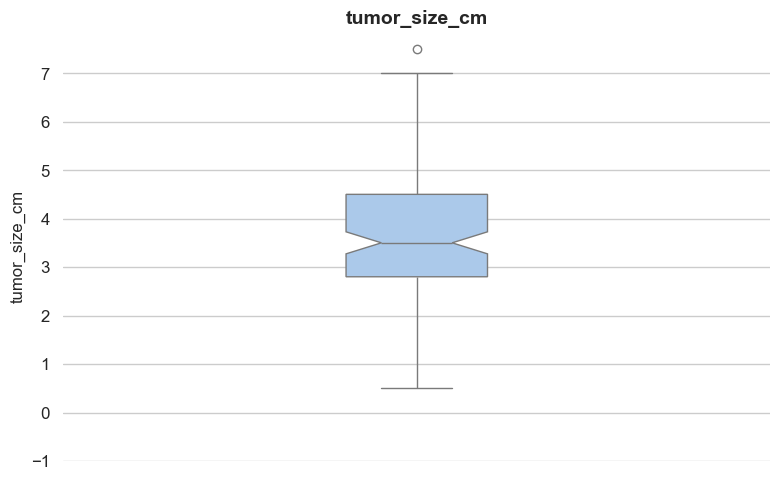

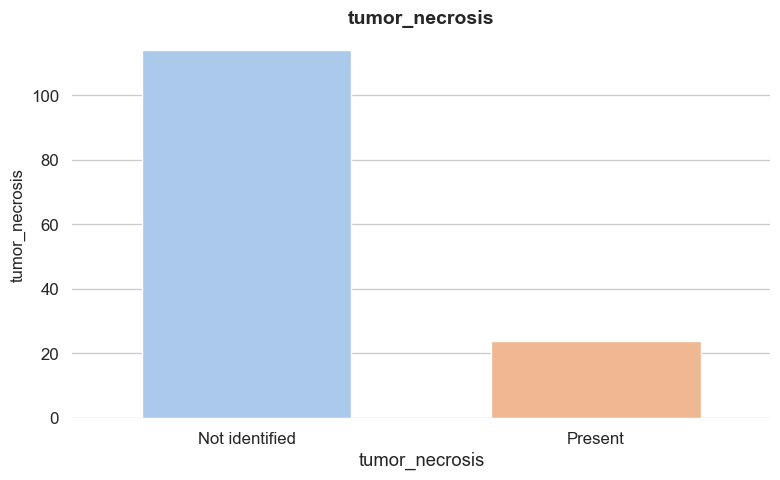

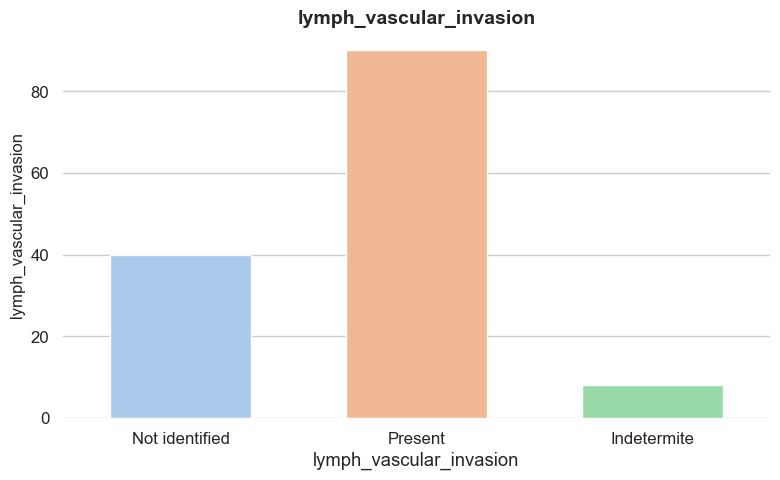

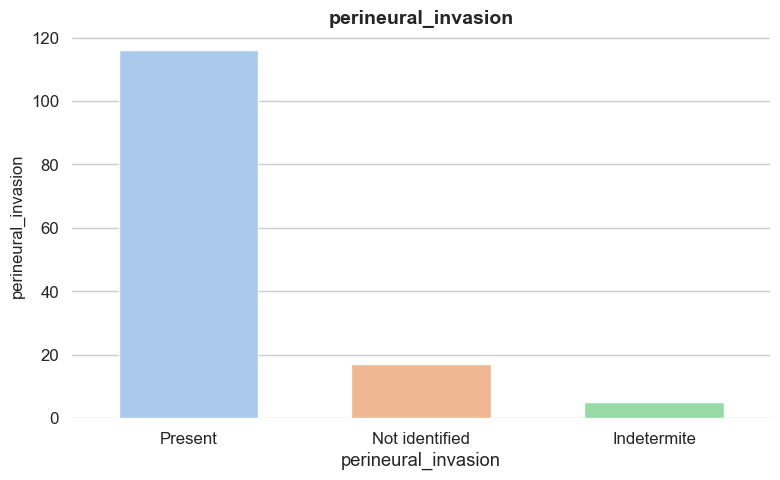

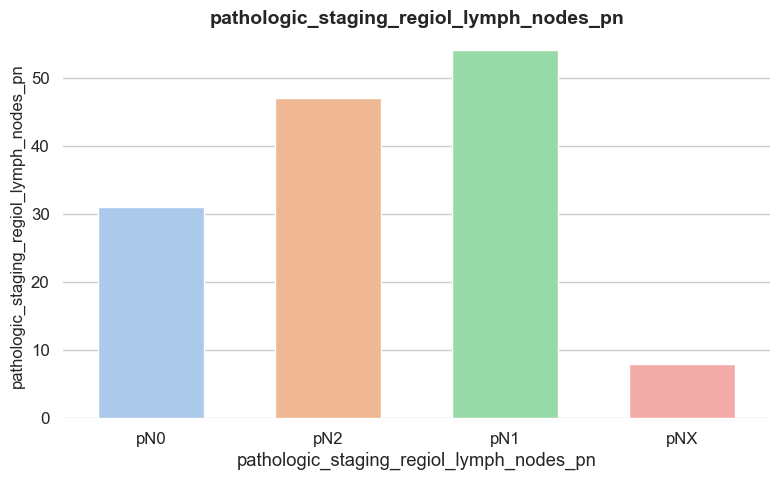

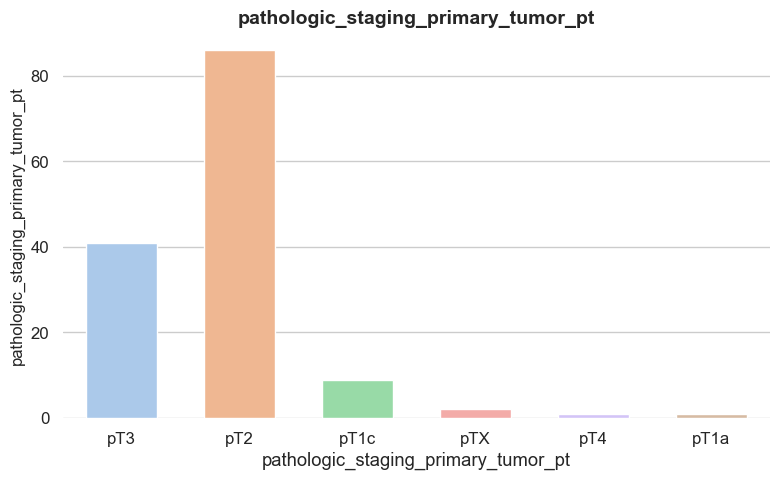

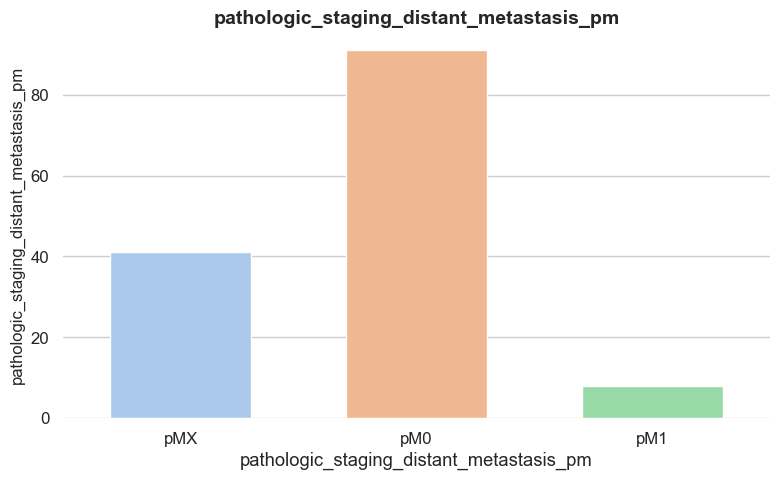

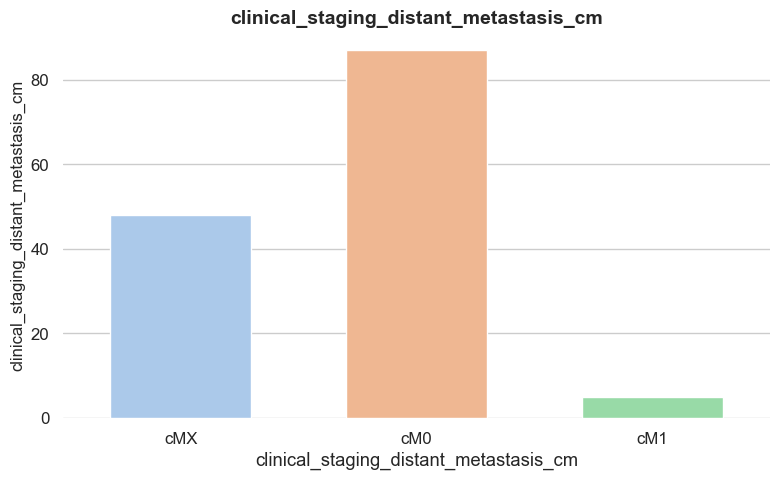

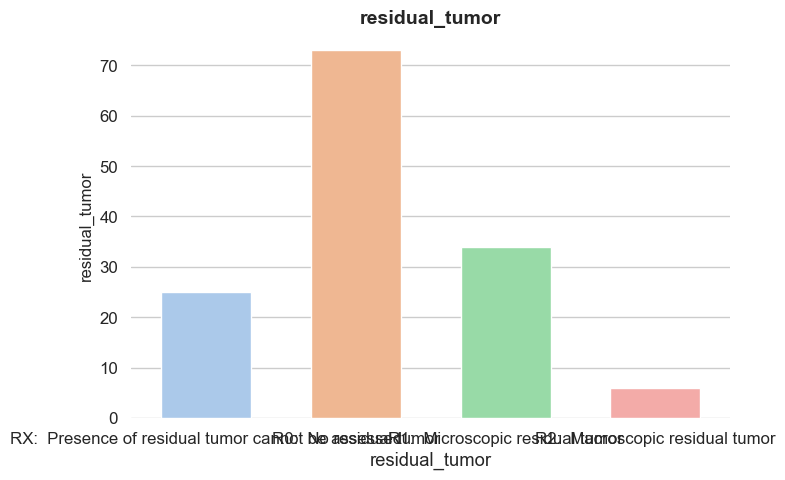

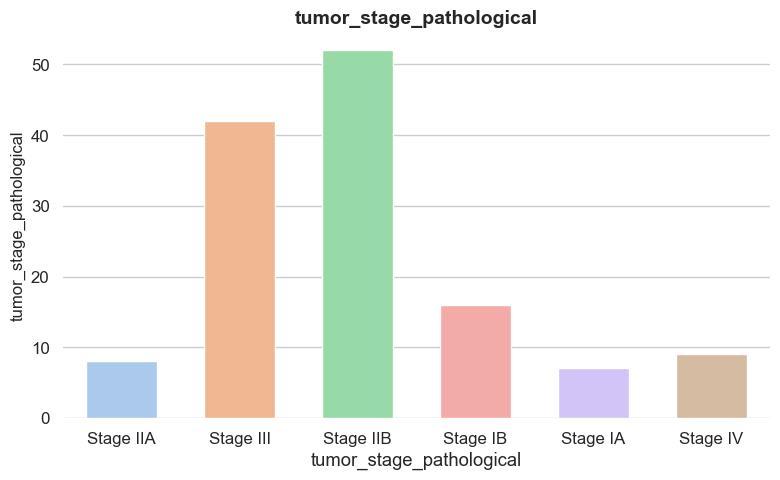

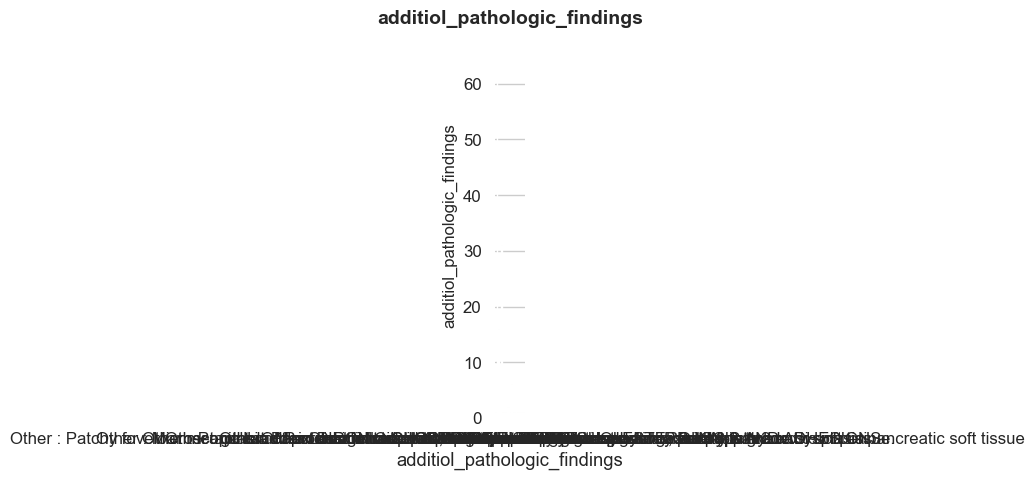

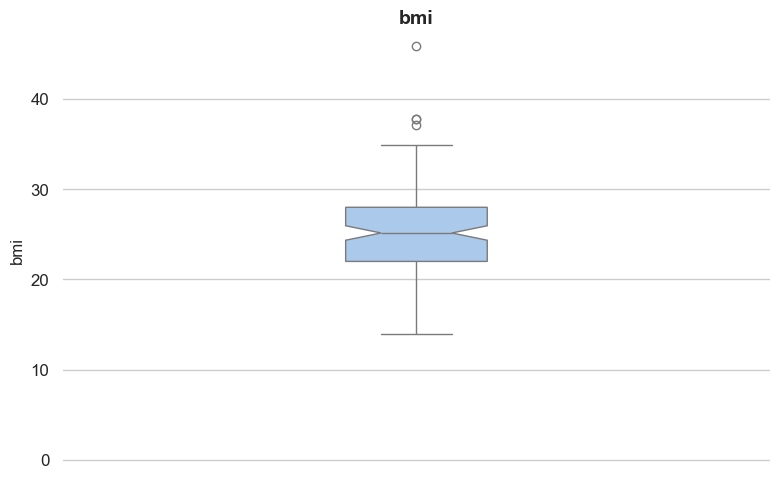

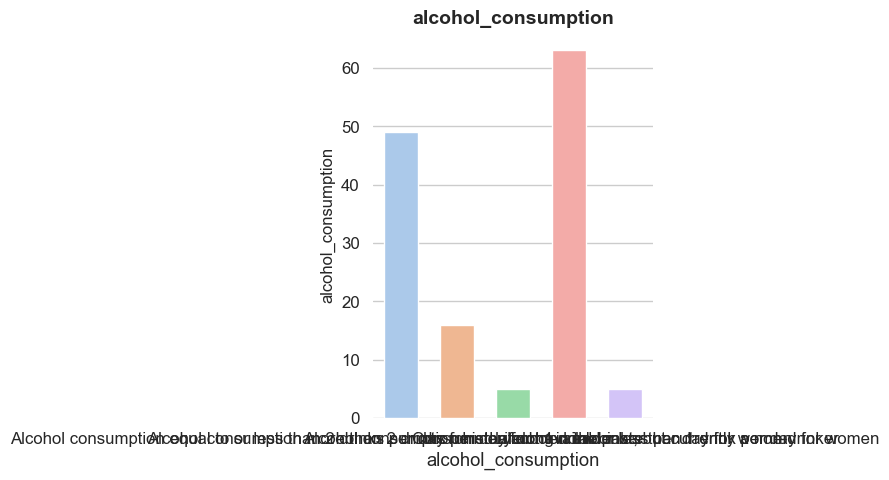

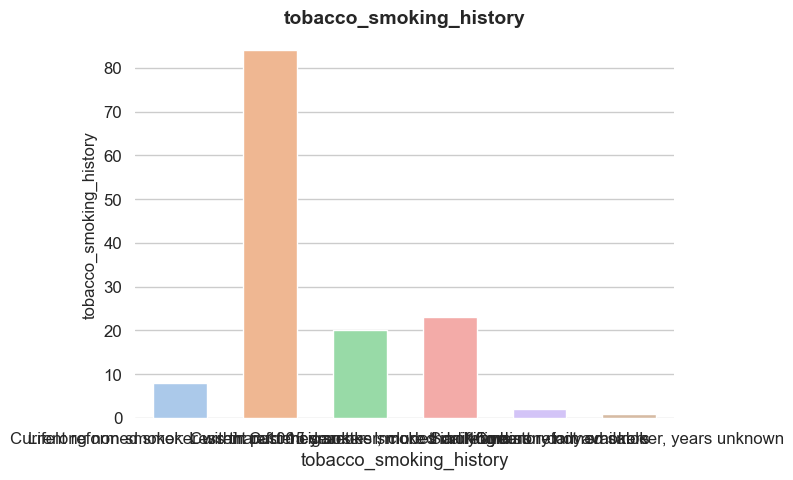

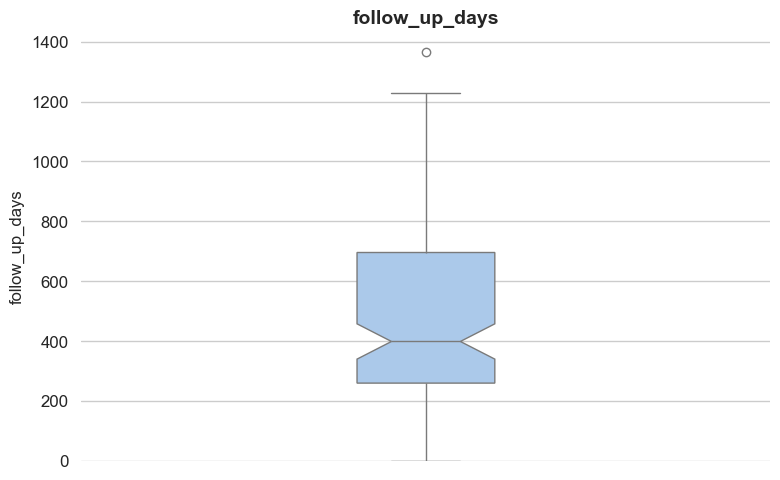

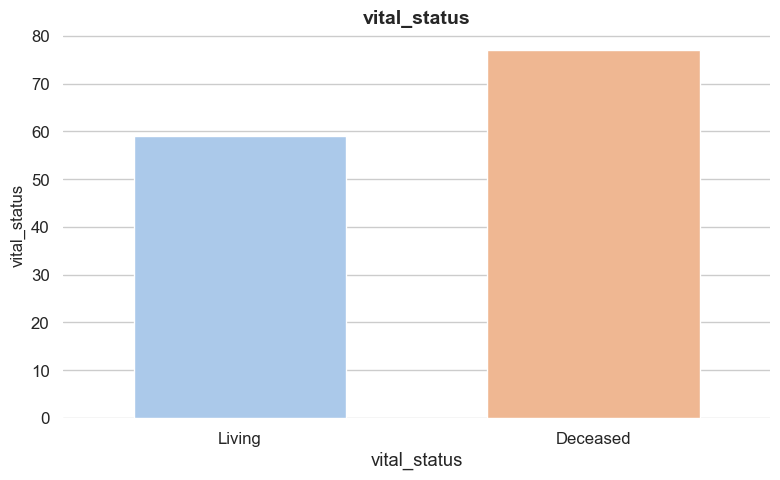

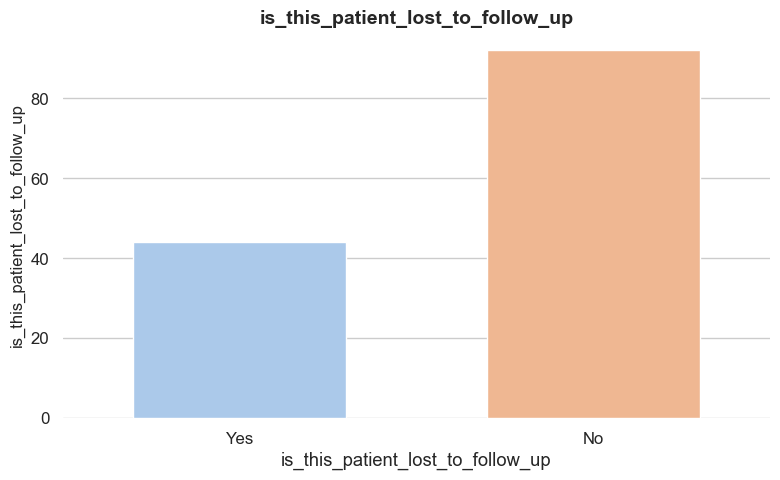

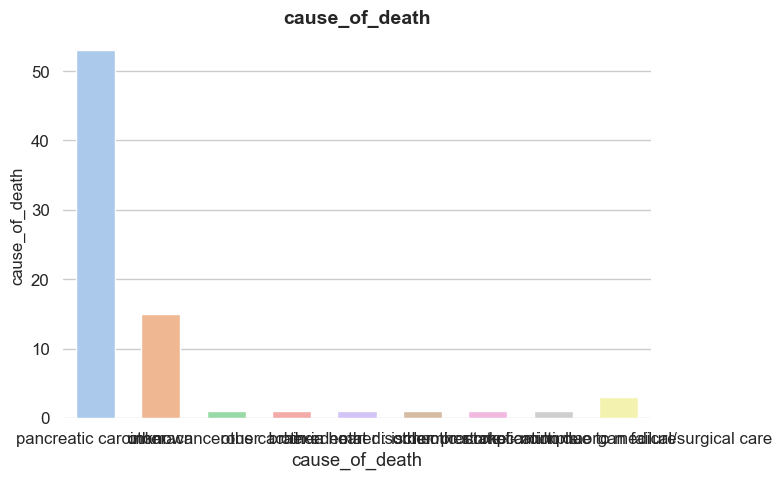

In [49]:
# PREPROCESSING (Categorical encoding, missing value imputation, scaling)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler

# Load dataset
df = pd.read_csv("Clinical data/clinical_data.csv", index_col=0)

for col in df.columns:
    if df[col].dtype == 'object':
        barplot(df, col)
    else:
        boxplot(df, col)

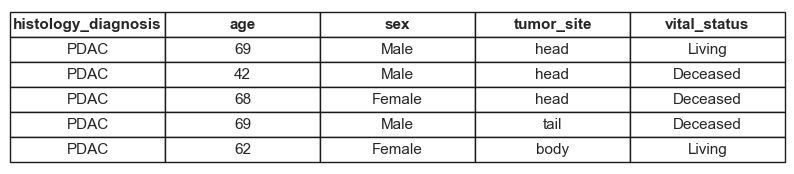

In [50]:
df.head()

head_df = df[['histology_diagnosis','age','sex','tumor_site','vital_status']].head()

# --- Create figure ---
fig, ax = plt.subplots(figsize=(10, 2))

# Remove all axes / borders
ax.axis('off')

# Create table with styling
table = ax.table(
    cellText=head_df.values,
    colLabels=head_df.columns,
    cellLoc='center',
    loc='center'
)

# Improve appearance
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 1.5)  # Increase row height

# fst row and column bold
for (row, _), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')

# Save high-quality PNG
plt.savefig("images/df_before.png", dpi=300, bbox_inches='tight', pad_inches=0)


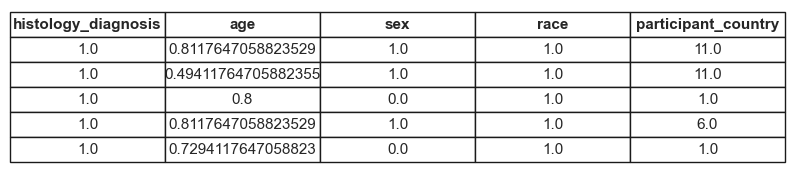

In [ ]:
# Separate categorical and numerical
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

# Impute missing values
df[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df[cat_cols])
df[num_cols] = SimpleImputer(strategy="mean").fit_transform(df[num_cols])

for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

scaler = MaxAbsScaler()
df[num_cols] = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

df.head()

head_df = df[['histology_diagnosis','age','sex','tumor_site','vital_status']].head()

# --- Create figure ---
fig, ax = plt.subplots(figsize=(10, 2))

# Remove all axes / borders
ax.axis('off')

# Create table with styling
table = ax.table(
    cellText=head_df.values,
    colLabels=head_df.columns,
    cellLoc='center',
    loc='center'
)

# Improve appearance
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 1.5)  # Increase row height

# fst row and column bold
for (row, _), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')

# Save high-quality PNG
plt.savefig("images/df_after.png", dpi=300, bbox_inches='tight', pad_inches=0)

In [52]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")